In [11]:
import pandas as pd
import numpy as np
import math as m

In [ ]:
https://stepik.org/media/attachments/lesson/363873/nyc.csv.zip

In [98]:
df=pd.read_csv('https://stepik.org/media/attachments/lesson/363873/nyc.csv.zip', compression='zip')

In [4]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


Перейдем к практике! Представьте, что вы аналитик в сервисе такси. Ваша задача – написать функцию haversine для подсчета расстояния между пунктами отправления и прибытия и, используя  pd.iterrows(), создать колонку distance с подсчитанным расстоянием. 
rr — радиус сферы, будем считать его равным 6371.
Таким образом, сама функция haversine() должна принимать на вход 5 параметров, один из которых должен иметь значение по умолчанию.

def haversine(..., ..., ..., ..., radius=6371):
    # ваш код

In [31]:
def haversine(lop, lod, lap, lad, r):
    lop=np.radians(lop)
    lod=np.radians(lod)
    lap=np.radians(lap)
    lad=np.radians(lad)
    d = 2*r*m.asin(m.sqrt((m.sin((lad-lap)/2))**2+m.cos(lap)*m.cos(lad)*m.sin((lod-lop)/2)**2))
    return d


lop_t=df.pickup_longitude[1]
lod_t=df.dropoff_longitude[1]
lap_t=df.pickup_latitude[1]
lad_t=df.dropoff_latitude[1]

haversine(lop_t, lod_t, lap_t, lad_t, 6371)

8.450133595805992

In [28]:
df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1


In [32]:
%%time
dists = [ ]
for i, row in df.iterrows():
    dists.append(haversine(row['pickup_longitude'],row['dropoff_longitude'], row['pickup_latitude'],
                           row['dropoff_latitude'], 6371 ))
df['distance'] = dists

Wall time: 4.53 s


In [33]:
%%time
df['distance'] = pd.Series(haversine(row['pickup_longitude'],row['dropoff_longitude'], row['pickup_latitude'],
                           row['dropoff_latitude'], 6371) for i, row in df.iterrows())

Wall time: 4.12 s


In [34]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [42]:
for row in df[:3].itertuples(name='custom_name'):
    print(row[2])

4.5
16.9
5.7


In [ ]:
%%time
df['distance'] = pd.Series(haversine(row['pickup_longitude'],row['dropoff_longitude'], row['pickup_latitude'],
                           row['dropoff_latitude'], 6371) for i, row in df.iterrows())

In [43]:
import pandas as pd
import numpy as np
import math as m

%%time

def haversine(lop, lod, lap, lad, r=6371):
    lop=np.radians(lop)
    lod=np.radians(lod)
    lap=np.radians(lap)
    lad=np.radians(lad)
    d = 2*r*m.asin(m.sqrt((m.sin((lad-lap)/2))**2+m.cos(lap)*m.cos(lad)*m.sin((lod-lop)/2)**2))
    return d

dists = [ ]
for row in df[:].itertuples(name='test'):
    dists.append(haversine(row[4],row[6], row[5],row[7]))
df['distance'] = dists

Wall time: 531 ms


In [44]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [48]:
%%time
df['distance'] = df[['pickup_longitude','dropoff_longitude', 'pickup_latitude',
                           'dropoff_latitude']]\
            .apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)

Wall time: 2.16 s


In [49]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [50]:
longest= df.distance.max()

8667.818812217454

In [74]:
%%time
def haversine(lop, lod, lap, lad, r=6371):
    lop, lod, lap, lad = [np.radians(x) for x in (lop, lod, lap, lad)]
    d = 2*r*np.arcsin(np.sqrt((np.sin((lad-lap)/2))**2+np.cos(lap)*np.cos(lad)*np.sin((lod-lop)/2)**2))
    return d

df['distance'] = haversine(df['pickup_longitude'], df['dropoff_longitude'], 
                           df['pickup_latitude'], df['dropoff_latitude'])

Wall time: 13 ms


In [71]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [107]:
%%time
def haversine(lop, lod, lap, lad, r=6371):
    lop, lod, lap, lad = [np.radians(x) for x in (lop, lod, lap, lad)]
    d = 2*r*np.arcsin(np.sqrt((np.sin((lad-lap)/2))**2+np.cos(lap)*np.cos(lad)*np.sin((lod-lop)/2)**2))
    return d

df['distance'] = haversine(df['pickup_longitude'].values, df['dropoff_longitude'].values, 
                           df['pickup_latitude'].values, df['dropoff_latitude'].values)

Wall time: 16.6 ms


In [76]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [108]:
df_right=df.query("dropoff_longitude!=0 | dropoff_latitude!=0")
df_right

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,4.940374
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.874706
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,2.263286
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.665245


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [100]:
df_right.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,49045.000000,49045.000000,49045.000000,49045.000000,49045.000000,49045.000000
mean,11.362722,-73.864325,40.677284,-73.916420,40.703692,1.669039
std,9.657274,3.161950,3.038180,2.463555,2.288267,1.290029
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992288,40.736407,-73.991327,40.735842,1.000000
50%,8.500000,-73.982105,40.753368,-73.980472,40.754063,1.000000
75%,12.500000,-73.968292,40.767731,-73.965260,40.768475,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


array([[<AxesSubplot:title={'center':'pickup_longitude'}>,
        <AxesSubplot:title={'center':'pickup_latitude'}>],
       [<AxesSubplot:title={'center':'dropoff_longitude'}>,
        <AxesSubplot:title={'center':'dropoff_latitude'}>]], dtype=object)

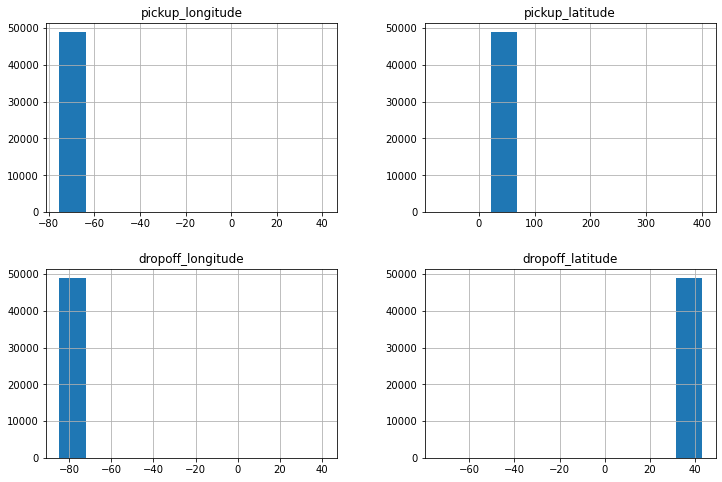

In [106]:
df_right[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].hist(figsize=[12,8], bins=10)

In [128]:
df_right[df_right.distance==df_right.query('10<pickup_latitude<120 & pickup_longitude<-60 & 10<dropoff_latitude \
               & dropoff_longitude<-60 & distance<=50').distance.max()]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
33502,2014-02-22 02:44:00.00000052,136.0,2014-02-22 02:44:00 UTC,-73.98954,40.757032,-73.86058,41.147487,1,44.746988
